In [942]:
import tensorflow as tf
import os
import matplotlib

In [943]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## 1.2 Remove Problematic Images

In [944]:
import cv2
import imghdr

In [945]:
data_dir = '/Users/kshitiztiwari/Deep_learning_projects/ImageClassification/Data'

In [946]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [947]:
os.listdir(os.path.join(data_dir,'happy'))

['images282.jpg',
 'images26.jpg',
 'images527.jpg',
 'images241.jpg',
 'images32.jpg',
 'image34.jpeg',
 '05-12-21-happy-people.jpg',
 'images686.jpg',
 'images692.jpg',
 'images123.jpg',
 'images137.jpg',
 'images679.jpg',
 'images484.jpg',
 'images321.jpg',
 'images453.jpg',
 'images308.jpg',
 'images334.jpg',
 '-businesspeople-choose-you-for-employment-or-recruitment-illustration-vector.jpg',
 'images136.jpg',
 'images650.jpg',
 'images122.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '107307587-1695837909104-gettyimages-1446934118-istock_2022_10_17-ja1-107.jpeg',
 'images718.jpg',
 'py-company-team-colleagues-jumping-flat-winning-characters-collection-vector.jpg',
 '170404-happy-workers-feature.jpg',
 'images268.jpg',
 'images240.jpg',
 'images532.jpg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg',
 'images283.jpg',
 'images297.jpg',
 'images295.jpg',
 'images31.jpg',
 'images242.jpg',
 'images524.jpg',
 'images530.jpg',
 'images25.jpg',
 'images256.jpg'

In [948]:
img = cv2.imread(os.path.join(data_dir, 'happy','35438_hd.jpg'))

In [949]:
# os.remove(os.path.join(data_dir, '.DS_Store'))


In [950]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir,image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e:
            print('Issue with Image {}'.format(image_path))

 ## 1.3 Load Data

In [951]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [952]:
import numpy as np
import matplotlib.pyplot  as plt

In [953]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1019 files belonging to 2 classes.


In [954]:
data_iterator = data.as_numpy_iterator()

In [955]:
batch = data_iterator.next()

In [956]:
# Image represents as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [957]:
#Labels of the image 
# Class 1 = Sad
# Class 0 = Happy
batch[1]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.104644775..255.0].


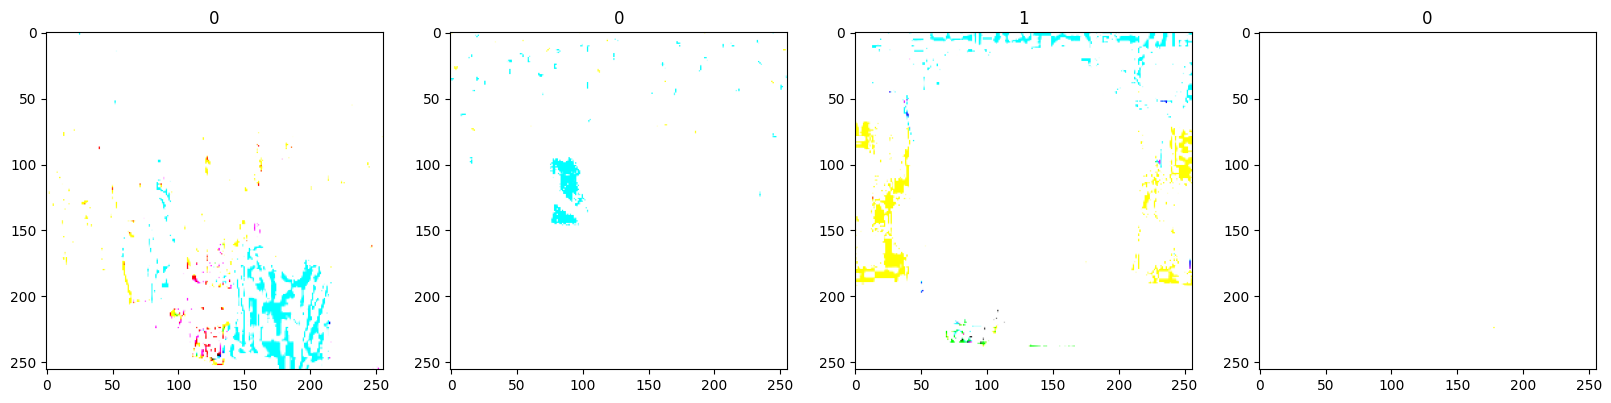

In [958]:
fig , ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2. Preprocess Data

2.1 Scale Data 

In [908]:
data = data.map(lambda x,y: (x/255 , y))

In [909]:
# scaled_iterator = data.as_numpy_iterator()
data.as_numpy_iterator().next()

(array([[[[0.64336705, 0.60415137, 0.59630823],
          [0.6555913 , 0.6163756 , 0.6085325 ],
          [0.66781557, 0.6285999 , 0.62075675],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.6457251 , 0.6065094 , 0.59866625],
          [0.6557322 , 0.61651653, 0.6086734 ],
          [0.6702206 , 0.6310049 , 0.6231618 ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.648606  , 0.6107843 , 0.5987592 ],
          [0.65721506, 0.6193934 , 0.60736823],
          [0.6731311 , 0.63530946, 0.62328434],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [910]:
batch = scaled_iterator.next()

In [911]:
batch[0].min()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.104644775..255.0].


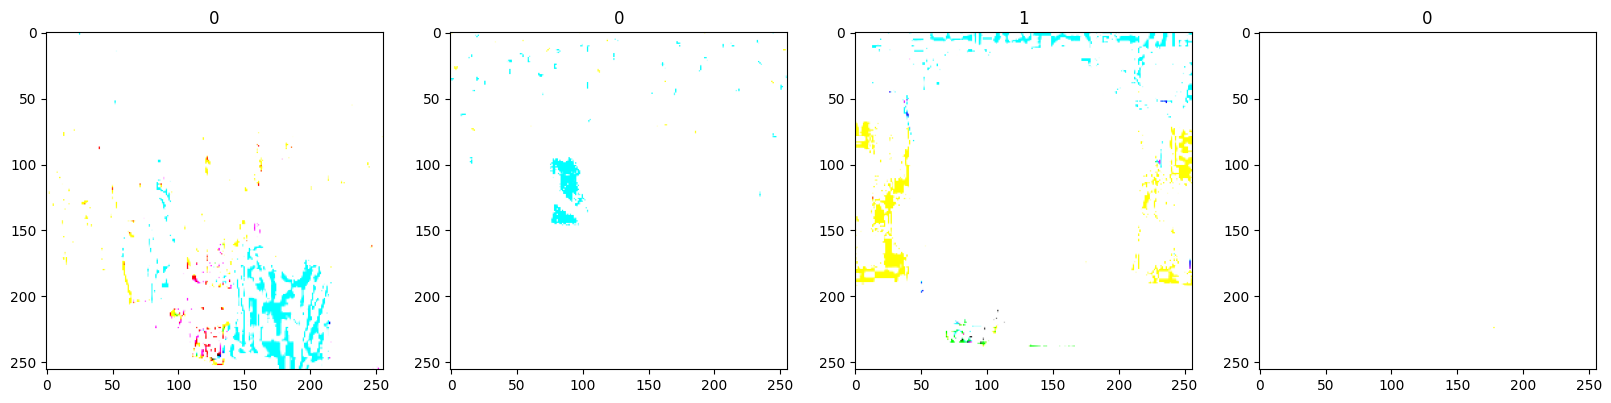

In [959]:
fig , ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

2.2 Split Data

In [913]:
len(data)

32

In [914]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [915]:
print(train_size, val_size, test_size)


22 6 4


In [916]:
train_size+val_size+test_size

32

In [917]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## 3. Deep Model

In [918]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [919]:
model = Sequential()

In [920]:
model.add(Conv2D(16, (3,3),1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
          


In [921]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
# Access the optimizer after model compilation and get the learning rate




In [922]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

3.2 Train

In [923]:
logdir = 'logs'

In [924]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [925]:
hist = model.fit(train, epochs = 30, validation_data = val, callbacks = [tensorboard_callback], shuffle = True)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 311ms/step - accuracy: 0.5271 - loss: 0.9683 - val_accuracy: 0.5833 - val_loss: 0.6539
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 326ms/step - accuracy: 0.6556 - loss: 0.6247 - val_accuracy: 0.6875 - val_loss: 0.5781
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 326ms/step - accuracy: 0.7464 - loss: 0.5099 - val_accuracy: 0.7031 - val_loss: 0.5482
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 352ms/step - accuracy: 0.7964 - loss: 0.4404 - val_accuracy: 0.8125 - val_loss: 0.4098
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 329ms/step - accuracy: 0.8568 - loss: 0.3649 - val_accuracy: 0.8177 - val_loss: 0.3946
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 330ms/step - accuracy: 0.8843 - loss: 0.2830 - val_accuracy: 0.8333 - val_loss: 0.3960
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step - accuracy: 0.9295 - loss: 0.2395 - val_accuracy: 0.8906 - val_loss: 0.2896
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 429ms/step - accuracy: 0.9544 - loss: 0.1572 - val_accuracy: 0

Plotting the loss

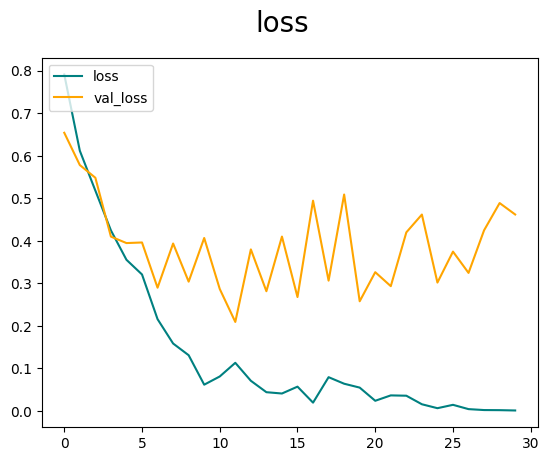

In [926]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

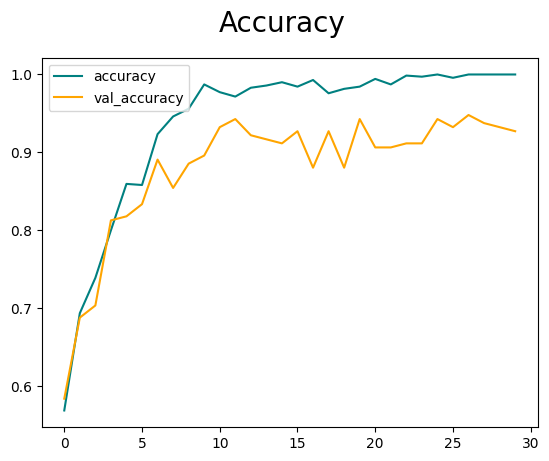

In [927]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

## 4. Evaluate Performance

4.1 Evaluate

In [928]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [929]:
pre = Precision()
re = Recall()
Accuracy = BinaryAccuracy()

In [930]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    Accuracy.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [931]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{Accuracy.result().numpy()}')

Precision:0.9384615421295166, Recall:0.953125, Accuracy:0.9430894255638123


4.2 Test

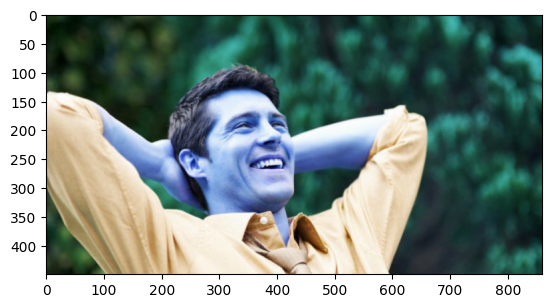

In [937]:
img_2 = cv2.imread('happy-man.jpg')
plt.imshow(img_2)
plt.show()


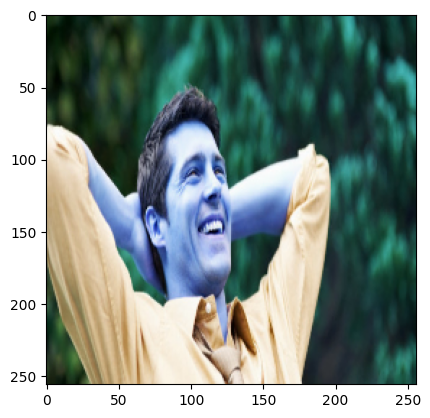

In [938]:
resized_image = tf.image.resize(img_2, (256,256))
plt.imshow(resized_image.numpy().astype(int))
plt.show()
           

In [939]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [940]:
yhat

array([[0.8942964]], dtype=float32)

In [941]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
